In [1]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import lstm, time #helper libraries

Using TensorFlow backend.
/Users/fanfan/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
#Step 1 Load Data
X_train, y_train, X_test, y_test = lstm.load_data('sp500.csv', 50, True)

In [3]:
#Step 2 Build Model
model = Sequential()

model.add(LSTM(
    input_dim=1,
    output_dim=50,
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
    100,
    return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(
    output_dim=1))
model.add(Activation('linear'))

start = time.time()
model.compile(loss='mse', optimizer='rmsprop')
print 'compilation time : ', time.time() - start

compilation time :  0.0713920593262


In [15]:
X_train.shape

(3709, 50, 1)

In [ ]:
#Step 3 Train the model
model.fit(
    X_train,
    y_train,
    batch_size=512,
    nb_epoch=10,
    validation_split=0.05)

Train on 3523 samples, validate on 186 samples
Epoch 1/10
3523/3523 [==============================] - 10s - loss: 6.5893e-04 - val_loss: 5.4091e-04
Epoch 2/10
3523/3523 [==============================] - 10s - loss: 5.9504e-04 - val_loss: 4.1240e-04
Epoch 3/10
2560/3523 [====================>.........] - ETA: 2s - loss: 5.4741e-04

In [8]:
#Step 4 - Plot the predictions!
predictions = lstm.predict_asequences_multiple(model, X_test, 50, 50)
lstm.plot_results_multiple(predictions, y_test, 50)

yo


TypeError: unsupported operand type(s) for +: 'NoneType' and 'float'

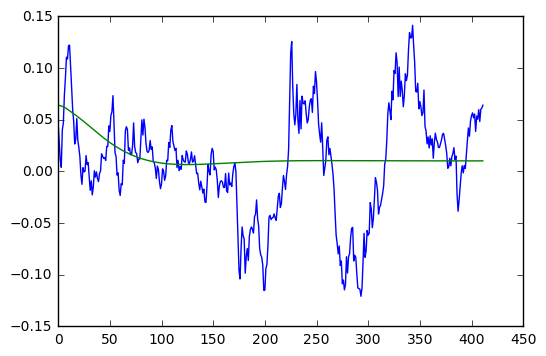

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(y_test)
plt.plot(predictions)